In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

num_classes = 10

img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    pe = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [2]:
from matplotlib import pyplot as plt

def train_and_plot(_inp_model, _epochs, _batch_size = 128):

  history = _inp_model.fit(x_train, y_train,
            batch_size=_batch_size,
            epochs=_epochs,
            verbose=1,
            validation_data=(x_test, y_test))

  score = model.evaluate(x_test, y_test, verbose=0)

  fig, axs = plt.subplots(1, 2, figsize=(10,3))
  axs[0].plot(history.history['accuracy'], label='Accuracy')
  axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
  axs[0].set_title('Accuracy')
  axs[0].legend(loc='lower right')

  axs[1].plot(history.history['loss'], label='Loss')
  axs[1].plot(history.history['val_loss'], label='Validation Loss')
  axs[1].set_title('Loss')
  axs[1].legend(loc='upper right')

  plt.show()

### Q1

Epoch 1/5
469/469 [==============================] - 9s 20ms/step - loss: 1.3183 - accuracy: 0.6262 - val_loss: 0.4294 - val_accuracy: 0.8852
Epoch 2/5
469/469 [==============================] - 9s 19ms/step - loss: 0.4923 - accuracy: 0.8501 - val_loss: 0.3253 - val_accuracy: 0.9081
Epoch 3/5
469/469 [==============================] - 9s 19ms/step - loss: 0.4083 - accuracy: 0.8762 - val_loss: 0.2814 - val_accuracy: 0.9186
Epoch 4/5
469/469 [==============================] - 9s 19ms/step - loss: 0.3698 - accuracy: 0.8880 - val_loss: 0.2529 - val_accuracy: 0.9245
Epoch 5/5
469/469 [==============================] - 9s 19ms/step - loss: 0.3383 - accuracy: 0.8984 - val_loss: 0.2302 - val_accuracy: 0.9319


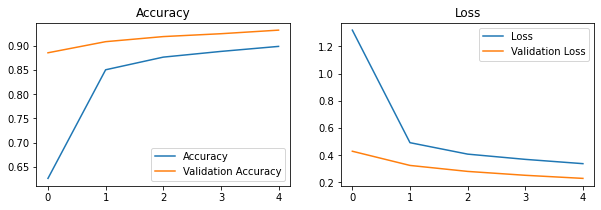

In [3]:
model = Sequential()
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=0.01),
              metrics=['accuracy'])

train_and_plot(model, 5)

Epoch 1/5
469/469 [==============================] - 3s 7ms/step - loss: 1.4963 - accuracy: 0.5922 - val_loss: 0.5571 - val_accuracy: 0.8528
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.5567 - accuracy: 0.8285 - val_loss: 0.3662 - val_accuracy: 0.8997
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.4436 - accuracy: 0.8646 - val_loss: 0.3129 - val_accuracy: 0.9117
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.3898 - accuracy: 0.8827 - val_loss: 0.2786 - val_accuracy: 0.9204
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.3553 - accuracy: 0.8918 - val_loss: 0.2563 - val_accuracy: 0.9261


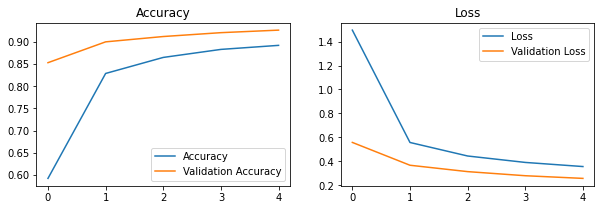

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=0.01),
              metrics=['accuracy'])

train_and_plot(model, 5)

### Q2

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 2.0229 - accuracy: 0.4356 - val_loss: 1.5352 - val_accuracy: 0.7662
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 1.1293 - accuracy: 0.7463 - val_loss: 0.7137 - val_accuracy: 0.8504
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.7007 - accuracy: 0.8104 - val_loss: 0.5027 - val_accuracy: 0.8779
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.5631 - accuracy: 0.8385 - val_loss: 0.4224 - val_accuracy: 0.8930
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.4969 - accuracy: 0.8559 - val_loss: 0.3786 - val_accuracy: 0.9020


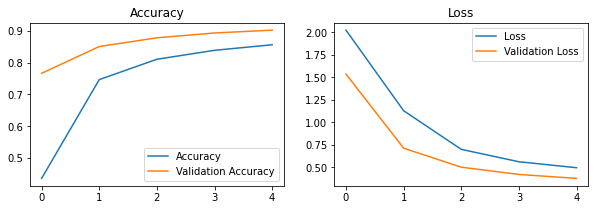

In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=0.01),
              metrics=['accuracy'])

train_and_plot(model, 5)

### Q3

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 2.0717 - accuracy: 0.3904 - val_loss: 1.6653 - val_accuracy: 0.7102
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 1.3206 - accuracy: 0.6987 - val_loss: 0.8821 - val_accuracy: 0.8266
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.8356 - accuracy: 0.7795 - val_loss: 0.5953 - val_accuracy: 0.8601
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.6621 - accuracy: 0.8119 - val_loss: 0.4838 - val_accuracy: 0.8811
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.5764 - accuracy: 0.8329 - val_loss: 0.4249 - val_accuracy: 0.8915


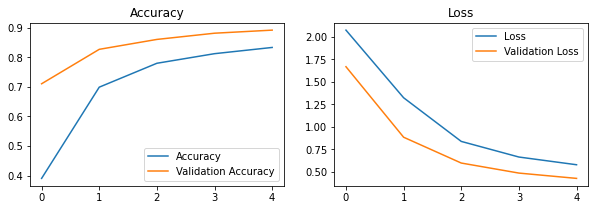

In [6]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=0.01),
              metrics=['accuracy'])

train_and_plot(model, 5)

Epoch 1/5
469/469 [==============================] - 2s 5ms/step - loss: 1.8703 - accuracy: 0.4725 - val_loss: 0.9424 - val_accuracy: 0.8079
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.7542 - accuracy: 0.7760 - val_loss: 0.4459 - val_accuracy: 0.8779
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.5421 - accuracy: 0.8330 - val_loss: 0.3631 - val_accuracy: 0.8976
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.4707 - accuracy: 0.8554 - val_loss: 0.3216 - val_accuracy: 0.9093
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.4247 - accuracy: 0.8711 - val_loss: 0.2915 - val_accuracy: 0.9179


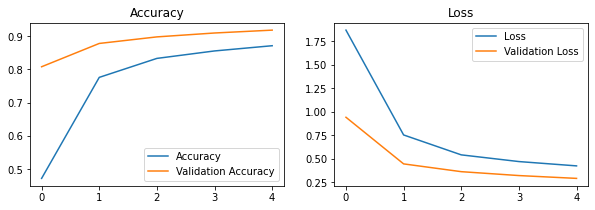

In [8]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=0.01),
              metrics=['accuracy'])

train_and_plot(model, 5)

Epoch 1/5
469/469 [==============================] - 4s 9ms/step - loss: 1.3542 - accuracy: 0.6008 - val_loss: 0.4176 - val_accuracy: 0.8848
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.4993 - accuracy: 0.8468 - val_loss: 0.3124 - val_accuracy: 0.9098
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.4093 - accuracy: 0.8742 - val_loss: 0.2636 - val_accuracy: 0.9259
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3677 - accuracy: 0.8878 - val_loss: 0.2336 - val_accuracy: 0.9321
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3307 - accuracy: 0.9004 - val_loss: 0.2116 - val_accuracy: 0.9390


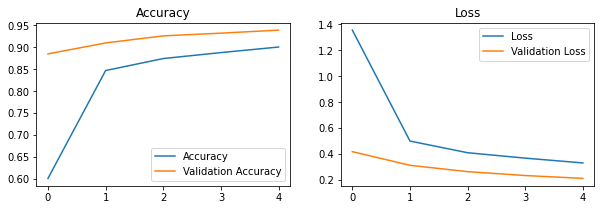

In [7]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=0.01),
              metrics=['accuracy'])

train_and_plot(model, 5)

### Q4

Epoch 1/5
469/469 [==============================] - 2s 5ms/step - loss: 2.3725 - accuracy: 0.1014 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 2.3343 - accuracy: 0.1024 - val_loss: 2.3008 - val_accuracy: 0.1135
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 2.3177 - accuracy: 0.1028 - val_loss: 2.3005 - val_accuracy: 0.1135
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 2.3126 - accuracy: 0.1024 - val_loss: 2.3004 - val_accuracy: 0.1135
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 2.3070 - accuracy: 0.1063 - val_loss: 2.3001 - val_accuracy: 0.1135


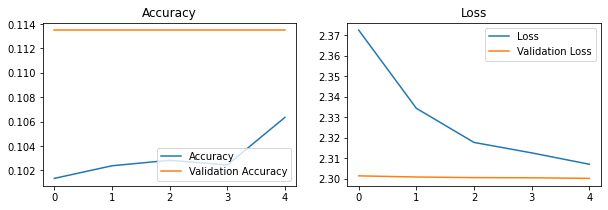

In [9]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='sigmoid', input_shape=input_shape))
model.add(Conv2D(16, (3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=0.01),
              metrics=['accuracy'])

train_and_plot(model, 5)

Epoch 1/5
469/469 [==============================] - 2s 5ms/step - loss: 1.8804 - accuracy: 0.4727 - val_loss: 1.2347 - val_accuracy: 0.7710
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.9243 - accuracy: 0.7771 - val_loss: 0.6275 - val_accuracy: 0.8478
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.6141 - accuracy: 0.8336 - val_loss: 0.4759 - val_accuracy: 0.8776
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.5103 - accuracy: 0.8568 - val_loss: 0.4075 - val_accuracy: 0.8935
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.4532 - accuracy: 0.8725 - val_loss: 0.3672 - val_accuracy: 0.9017


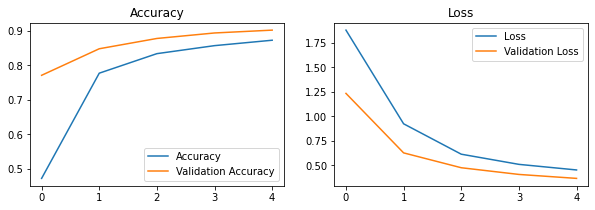

In [11]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='tanh', input_shape=input_shape))
model.add(Conv2D(16, (3, 3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=0.01),
              metrics=['accuracy'])

train_and_plot(model, 5)

Epoch 1/5
469/469 [==============================] - 2s 5ms/step - loss: 2.1325 - accuracy: 0.2902 - val_loss: 1.6803 - val_accuracy: 0.6897
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 1.1606 - accuracy: 0.6717 - val_loss: 0.6012 - val_accuracy: 0.8458
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.7099 - accuracy: 0.7750 - val_loss: 0.4452 - val_accuracy: 0.8774
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.6011 - accuracy: 0.8099 - val_loss: 0.3884 - val_accuracy: 0.8909
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.5449 - accuracy: 0.8297 - val_loss: 0.3547 - val_accuracy: 0.8986


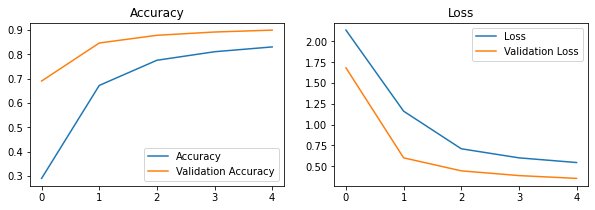

In [10]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=0.01),
              metrics=['accuracy'])

train_and_plot(model, 5)

### Q5

Epoch 1/5
469/469 [==============================] - 2s 5ms/step - loss: 1.9161 - accuracy: 0.4277 - val_loss: 1.0013 - val_accuracy: 0.8036
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.8352 - accuracy: 0.7458 - val_loss: 0.4566 - val_accuracy: 0.8804
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.5890 - accuracy: 0.8168 - val_loss: 0.3619 - val_accuracy: 0.9034
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.5042 - accuracy: 0.8440 - val_loss: 0.3154 - val_accuracy: 0.9139
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.4486 - accuracy: 0.8628 - val_loss: 0.2837 - val_accuracy: 0.9209


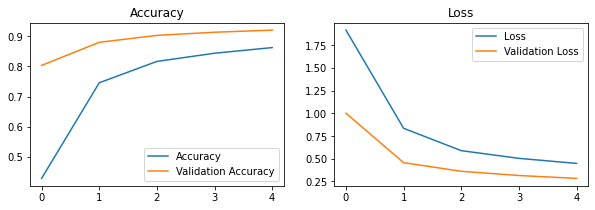

In [12]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=0.01),
              metrics=['accuracy'])

train_and_plot(model, 5)

### Q6

Epoch 1/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1956 - accuracy: 0.9396 - val_loss: 0.0537 - val_accuracy: 0.9819
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0620 - accuracy: 0.9813 - val_loss: 0.0405 - val_accuracy: 0.9863
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0474 - accuracy: 0.9859 - val_loss: 0.0324 - val_accuracy: 0.9893
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0380 - accuracy: 0.9886 - val_loss: 0.0310 - val_accuracy: 0.9903
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0332 - accuracy: 0.9897 - val_loss: 0.0314 - val_accuracy: 0.9895


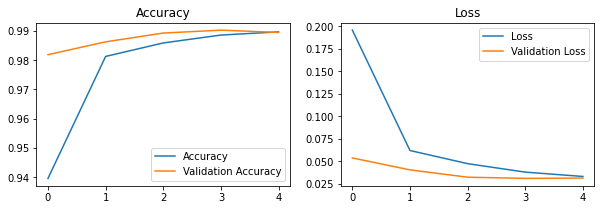

In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

train_and_plot(model, 5)

### Q7

Epoch 1/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1997 - accuracy: 0.9395 - val_loss: 0.0518 - val_accuracy: 0.9825
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0643 - accuracy: 0.9807 - val_loss: 0.0367 - val_accuracy: 0.9880
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0448 - accuracy: 0.9863 - val_loss: 0.0314 - val_accuracy: 0.9889
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0383 - accuracy: 0.9883 - val_loss: 0.0303 - val_accuracy: 0.9892
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0320 - accuracy: 0.9900 - val_loss: 0.0280 - val_accuracy: 0.9907


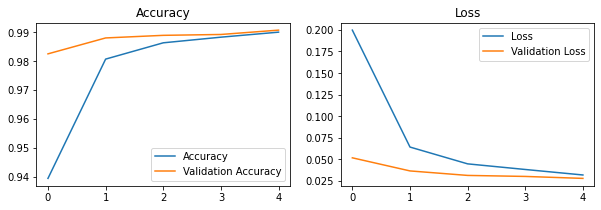

In [15]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

train_and_plot(model, 5)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1642 - accuracy: 0.9492 - val_loss: 0.0439 - val_accuracy: 0.9849
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0548 - accuracy: 0.9838 - val_loss: 0.0327 - val_accuracy: 0.9895
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0417 - accuracy: 0.9874 - val_loss: 0.0329 - val_accuracy: 0.9898
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0334 - accuracy: 0.9898 - val_loss: 0.0311 - val_accuracy: 0.9903
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0287 - accuracy: 0.9915 - val_loss: 0.0275 - val_accuracy: 0.9913


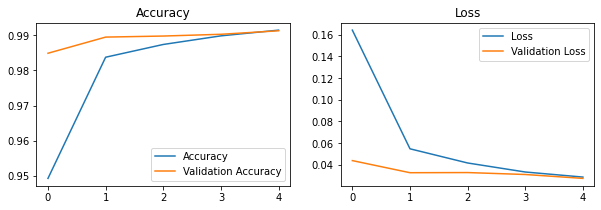

In [16]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

train_and_plot(model, 5)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1855 - accuracy: 0.9418 - val_loss: 0.0415 - val_accuracy: 0.9867
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0591 - accuracy: 0.9824 - val_loss: 0.0311 - val_accuracy: 0.9897
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0437 - accuracy: 0.9870 - val_loss: 0.0332 - val_accuracy: 0.9891
Epoch 4/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0362 - accuracy: 0.9894 - val_loss: 0.0286 - val_accuracy: 0.9917
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0309 - accuracy: 0.9913 - val_loss: 0.0275 - val_accuracy: 0.9910


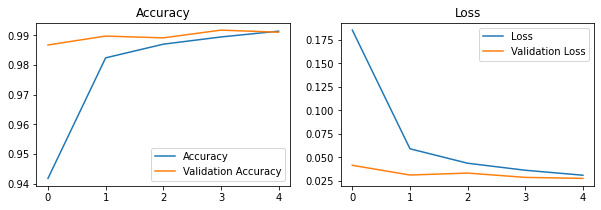

In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(7, 7), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, (7, 7), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

train_and_plot(model, 5)

### Q8

Epoch 1/5
469/469 [==============================] - 3s 7ms/step - loss: 0.2081 - accuracy: 0.9354 - val_loss: 0.0617 - val_accuracy: 0.9803
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0689 - accuracy: 0.9794 - val_loss: 0.0363 - val_accuracy: 0.9872
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0506 - accuracy: 0.9848 - val_loss: 0.0344 - val_accuracy: 0.9879
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0407 - accuracy: 0.9876 - val_loss: 0.0341 - val_accuracy: 0.9885
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0354 - accuracy: 0.9894 - val_loss: 0.0298 - val_accuracy: 0.9908


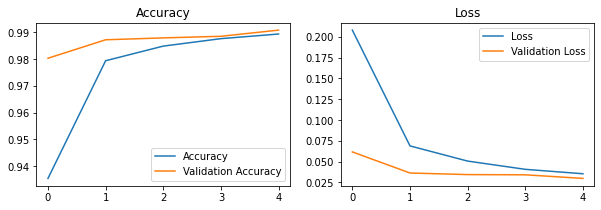

In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

train_and_plot(model, 5)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1694 - accuracy: 0.9473 - val_loss: 0.0465 - val_accuracy: 0.9844
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0546 - accuracy: 0.9840 - val_loss: 0.0349 - val_accuracy: 0.9885
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0419 - accuracy: 0.9873 - val_loss: 0.0319 - val_accuracy: 0.9895
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0330 - accuracy: 0.9898 - val_loss: 0.0249 - val_accuracy: 0.9915
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0282 - accuracy: 0.9913 - val_loss: 0.0254 - val_accuracy: 0.9916


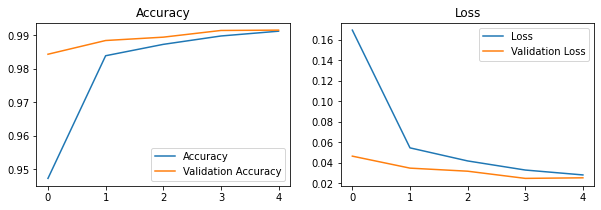

In [19]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

train_and_plot(model, 5)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1701 - accuracy: 0.9464 - val_loss: 0.0415 - val_accuracy: 0.9852
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0525 - accuracy: 0.9837 - val_loss: 0.0333 - val_accuracy: 0.9886
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0384 - accuracy: 0.9884 - val_loss: 0.0309 - val_accuracy: 0.9897
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0305 - accuracy: 0.9906 - val_loss: 0.0263 - val_accuracy: 0.9916
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0270 - accuracy: 0.9919 - val_loss: 0.0244 - val_accuracy: 0.9923


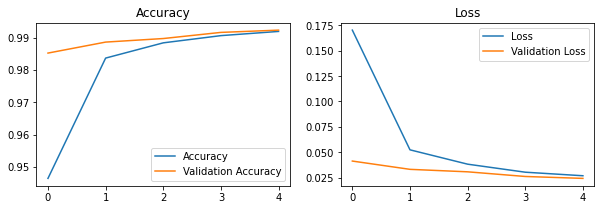

In [18]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, (7, 7), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

train_and_plot(model, 5)

### Q9

Epoch 1/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1994 - accuracy: 0.9387 - val_loss: 0.0617 - val_accuracy: 0.9791
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0659 - accuracy: 0.9803 - val_loss: 0.0370 - val_accuracy: 0.9866
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0477 - accuracy: 0.9854 - val_loss: 0.0396 - val_accuracy: 0.9866
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0389 - accuracy: 0.9882 - val_loss: 0.0354 - val_accuracy: 0.9883
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0332 - accuracy: 0.9898 - val_loss: 0.0296 - val_accuracy: 0.9912


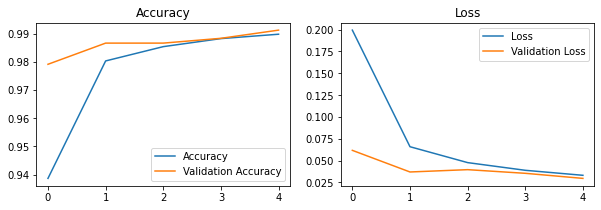

In [20]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

train_and_plot(model, 5)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2222 - accuracy: 0.9302 - val_loss: 0.0639 - val_accuracy: 0.9783
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0725 - accuracy: 0.9774 - val_loss: 0.0393 - val_accuracy: 0.9870
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0538 - accuracy: 0.9835 - val_loss: 0.0336 - val_accuracy: 0.9888
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0452 - accuracy: 0.9863 - val_loss: 0.0336 - val_accuracy: 0.9895
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0386 - accuracy: 0.9882 - val_loss: 0.0306 - val_accuracy: 0.9901


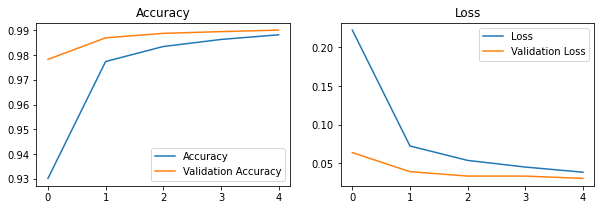

In [21]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

train_and_plot(model, 5)